<h1>Hypothesis: "Antartic locations with subterrainian lake will have flatter surafce ice slopes"</h1>

Data Used:
    lakes:
        https://nsidc.org/data/nsidc-0523/versions/1 (this is massive)

        https://www.npolar.no/quantarctica/#toggle-id-15 
        wright & siegert
        blankenship
        smith
        bell (recovery)
        studinger (vostok)
        optional: flux Le Brocq

    slopes:
        https://www.bas.ac.uk/project/bedmap-2/#data
        https://www.pgc.umn.edu/data/rema/
    
    support:
        https://usicecenter.gov/Products/AntarcData "Weekly Antartic Shapefile"
        https://www.npolar.no/quantarctica/ (this has mostly everything)
        https://www.bas.ac.uk/data/our-data/data-systems/

<Axes: >

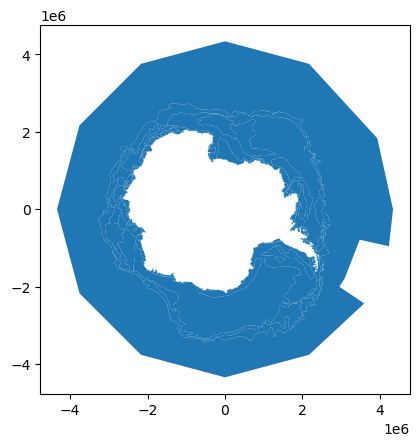

In [1]:
import geopandas as gpd
import rioxarray as xrio

shapefile_path = 'data\\antarc241115\ANTARC241115.shp'
gdf = gpd.read_file(shapefile_path)
gdf.plot()

In [2]:
print(type(gdf))
gdf

<class 'geopandas.geodataframe.GeoDataFrame'>


,CT,CA,CB,CC,SO,SA,SB,SC,SD,FA,FB,FC,FS,FP,ICECODE,POLY_TYPE,Shape_Leng,Shape_Area,geometry
0,00,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,CT00CA-9-9-9CB-9-9-9CC-9-9-9CF-9-9CN-9CD-9,W,5.520622e+07,2.771760e+13,"POLYGON ((2169942.781 3758451.156, 3933272.094..."
1,13,-9,-9,-9,98,86,-9,-9,-9,-9,-9,-9,-9,-9,CT13CA-986-9CB-9-9-9CC-9-9-9CF-9-9CN98CD-9,I,1.021520e+06,1.638804e+10,"POLYGON ((-563727.446 -3332354.893, -572121.63..."
2,13,-9,-9,-9,98,86,-9,-9,-9,-9,-9,-9,-9,-9,CT13CA-986-9CB-9-9-9CC-9-9-9CF-9-9CN98CD-9,I,5.263802e+05,3.644714e+09,"POLYGON ((2220492.5 -840149.668, 2220944.923 -..."
3,13,-9,-9,-9,98,86,-9,-9,-9,-9,-9,-9,-9,-9,CT13CA-986-9CB-9-9-9CC-9-9-9CF-9-9CN98CD-9,I,6.635708e+06,1.216410e+11,"POLYGON ((2568905.293 -685088.448, 2571124.879..."
4,13,-9,-9,-9,98,86,-9,-9,-9,-9,-9,-9,-9,-9,CT13CA-986-9CB-9-9-9CC-9-9-9CF-9-9CN98CD-9,I,4.403055e+05,4.590068e+09,"POLYGON ((2127519.556 -742200.07, 2118697.306 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,92,10,90,-9,-9,98,95,-9,-9,-9,-9,-9,-9,08,CT92CA1098-9CB9095-9CC-9-9-9CF08-9CN-9CD-9,I,1.300501e+06,1.292010e+10,"POLYGON ((-1900875.743 1502126.812, -1902653.7..."
166,92,10,90,-9,-9,98,95,-9,-9,-9,-9,-9,-9,08,CT92CA1098-9CB9095-9CC-9-9-9CF08-9CN-9CD-9,I,3.173670e+05,1.712026e+09,"POLYGON ((-358272.532 1693799.95, -357280.343 ..."
167,92,10,90,-9,-9,98,95,-9,-9,-9,-9,-9,-9,08,CT92CA1098-9CB9095-9CC-9-9-9CF08-9CN-9CD-9,I,5.939246e+05,1.063043e+10,"POLYGON ((-1744303.065 1864124.491, -1725569.9..."
168,92,10,90,-9,-9,98,95,-9,-9,-9,-9,-9,-9,08,CT92CA1098-9CB9095-9CC-9-9-9CF08-9CN-9CD-9,I,1.450039e+06,1.791794e+10,"POLYGON ((-752589.019 2061331.717, -748499.198..."


In [3]:
gdf.crs

<Projected CRS: PROJCS["WGS_1984_Stereographic_South_Pole",GEOGCS[ ...>
Name: WGS_1984_Stereographic_South_Pole
Axis Info [cartesian]:
- [north]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Polar Stereographic (variant B)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

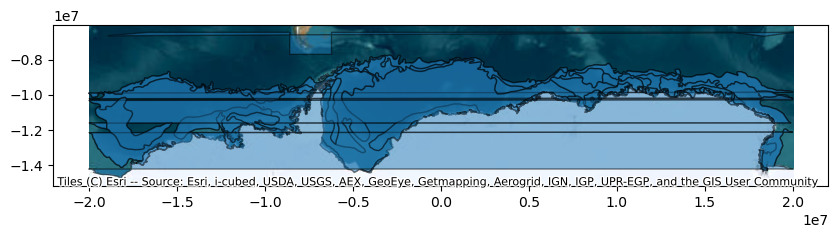

In [ ]:
import contextily as ctx
import matplotlib.pyplot as plt

# Reproject to Web Mercator (EPSG:3857) for compatibility with basemaps
gdf_web_mercator = gdf.to_crs("EPSG:3857")

# Plot
ax = gdf_web_mercator.plot(figsize=(10, 10), edgecolor="k", alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)
plt.show()

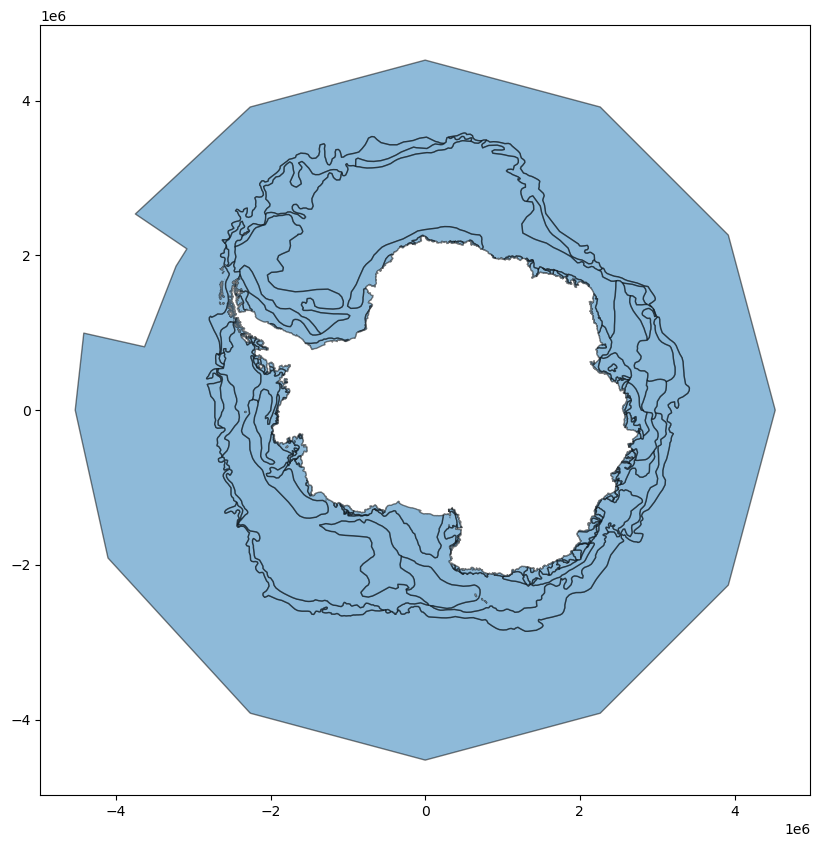

In [5]:
fixed = gdf_web_mercator.to_crs("EPSG:3031")
ax = fixed.plot(figsize=(10, 10), edgecolor="k", alpha=0.5)

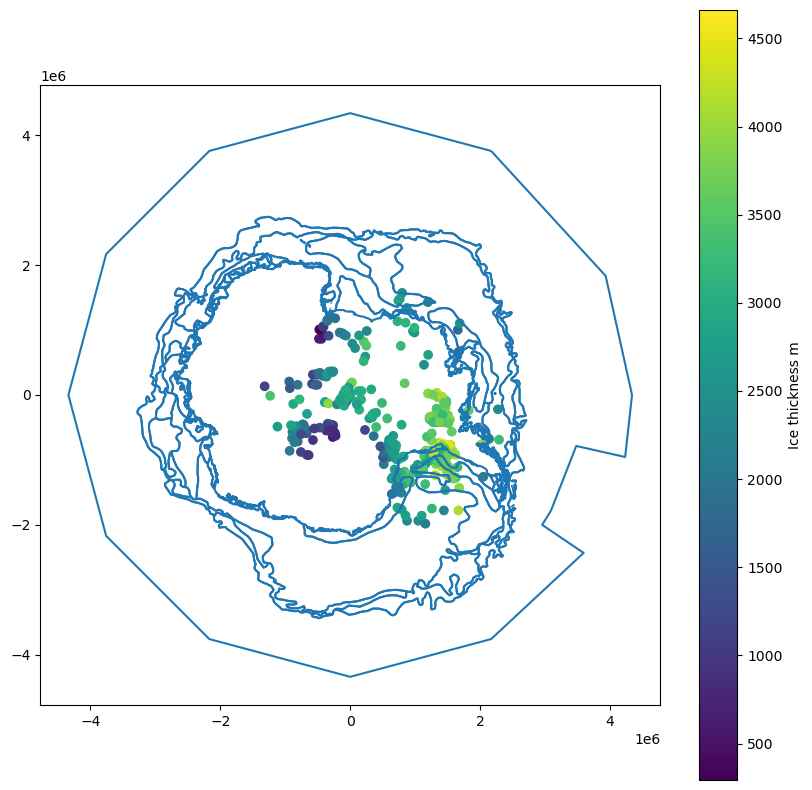

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

import cartopy.crs as ccrs

# load Antarctic subglacial lakes
lakes = pd.read_csv('data/lakes/subglacial_lakes_2012update.csv', encoding='latin1')
lakes.rename(columns={'Lat.         oN':'Latitude', 'Lon.       oE':'Longitude'}, inplace=True)
lakes_gdf = gpd.GeoDataFrame(lakes, geometry=gpd.points_from_xy(lakes['Longitude'], lakes['Latitude']))

# we are plotting in Antarctic polar stereographic projection
crs = ccrs.SouthPolarStereo()
crs_proj4 = crs.proj4_init
lakes_gdf.set_crs(epsg=4326, inplace=True)

world = gpd.read_file('data/antarc241115/ANTARC241115.shp')
w = world.to_crs(crs_proj4)
fig, ax = plt.subplots(figsize=(10, 10))
lakes_gdf.to_crs(w.crs, inplace=True)
world.boundary.plot(ax=ax)
lakes_gdf.plot(ax=ax, cmap='viridis', column='Ice thickness m', legend=True, legend_kwds={'label': "Ice thickness m"})
plt.show()

In [7]:
import geopandas as gpd

# Example: Suppose `gdf` is your GeoDataFrame
# Ensure the GeoDataFrame has a valid geometry column
if not lakes_gdf.empty and gdf.geometry.is_valid.all():
    # Save the GeoDataFrame as a shapefile
    lakes_gdf.to_file("output_shapefile.shp", driver="ESRI Shapefile")
else:
    print("The GeoDataFrame is empty or contains invalid geometries.")


C:\Users\Alex\AppData\Local\Temp\ipykernel_19600\3687347134.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  lakes_gdf.to_file("output_shapefile.shp", driver="ESRI Shapefile")
c:\Users\Alex\anaconda3\envs\rast_env\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Ice thickness m' to 'Ice thickn'
  ogr_write(


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

import cartopy.crs as ccrs

# load Antarctic subglacial lakes
lakes = pd.read_csv('data/lakes/subglacial_lakes_2012update.csv', encoding='latin1')
lakes.rename(columns={'Lat.         oN':'Latitude', 'Lon.       oE':'Longitude'}, inplace=True)
lakes_gdf = gpd.GeoDataFrame(lakes, geometry=gpd.points_from_xy(lakes['Longitude'], lakes['Latitude']))

# we are plotting in Antarctic polar stereographic projection
crs = ccrs.SouthPolarStereo()
crs_proj4 = crs.proj4_init
lakes_gdf.set_crs(epsg=4326, inplace=True)




,Tally,Name,Latitude,Longitude,Length m,Width m,Depth m,Area km2,Volume km3,Ice thickness m,References,geometry
0,1,Sovetskaya Lake,-78.100,88.500,75000,35000.0,NaN,1600.0,NaN,4200.0,Located beneath Sovetskaya Station. The first ...,POINT (88.5 -78.1)
1,2,Lake Vostok,-78.150,104.500,280000,44000.0,1067.0,14000.0,5400.0,3945.0,Included in the first inventory of Oswald and ...,POINT (104.5 -78.15)
2,3,SPRI-3,-76.570,124.800,5000,NaN,NaN,NaN,NaN,3621.0,Oswald and Robin (1973),POINT (124.8 -76.57)
3,4,SPRI-4,-73.280,157.280,3500,NaN,NaN,NaN,NaN,2827.0,Oswald and Robin (1973),POINT (157.28 -73.28)
4,5,SPRI-5,-77.200,119.270,10000,NaN,NaN,NaN,NaN,3835.0,Oswald and Robin (1973),POINT (119.27 -77.2)
...,...,...,...,...,...,...,...,...,...,...,...,...
374,375,R13Ea_8,-75.981,106.045,3500,NaN,NaN,NaN,NaN,3521.0,Wright et al. (2012),POINT (106.045 -75.981)
375,376,R15Ea_4,-74.084,100.818,1800,NaN,NaN,NaN,NaN,3523.0,Wright et al. (2012),POINT (100.818 -74.084)
376,377,Site A,-67.800,112.540,NaN,NaN,NaN,NaN,NaN,NaN,"N. Young (personal comm.), drained followed by...",POINT (112.54 -67.8)
377,378,Site B,-67.870,113.530,NaN,NaN,NaN,NaN,NaN,NaN,"N. Young (personal comm.), filling site, near ...",POINT (113.53 -67.87)


In [9]:
fixed.crs

<Projected CRS: EPSG:3031>
Name: WGS 84 / Antarctic Polar Stereographic
Axis Info [cartesian]:
- E[north]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Antarctica.
- bounds: (-180.0, -90.0, 180.0, -60.0)
Coordinate Operation:
- name: Antarctic Polar Stereographic
- method: Polar Stereographic (variant B)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

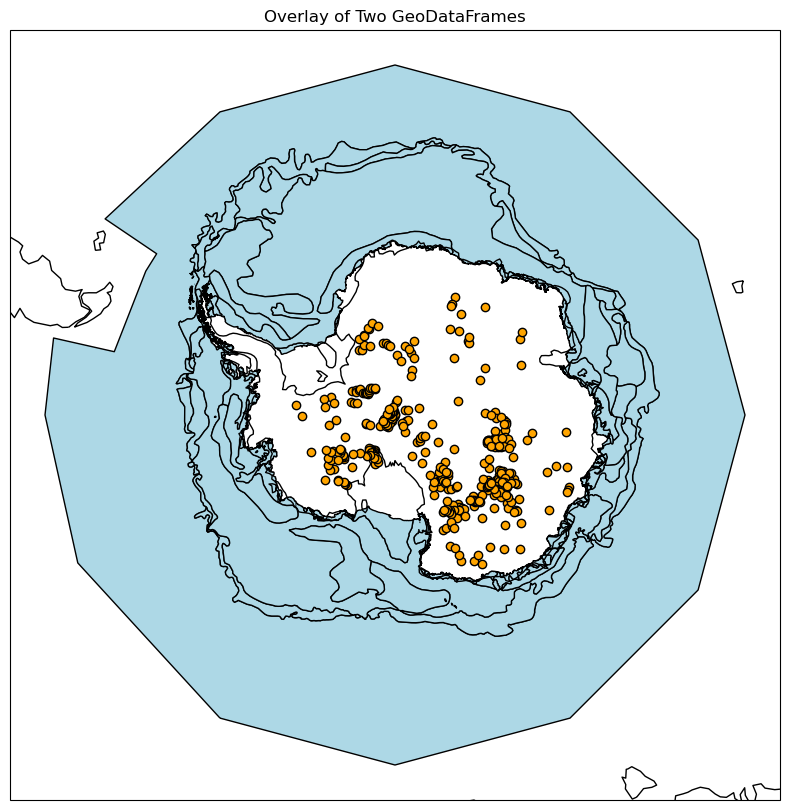

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

gdf2 = lakes_gdf.to_crs("EPSG:3031")

proj = ccrs.Stereographic(central_longitude=0, central_latitude=-90)

fig, ax = plt.subplots(subplot_kw={"projection": proj}, figsize=(10, 10))

fixed.plot(ax=ax, facecolor='lightblue', edgecolor='black')
gdf2.plot(ax=ax, facecolor='orange', edgecolor='black')

ax.coastlines()
ax.set_title("Overlay of Two GeoDataFrames")

plt.show()


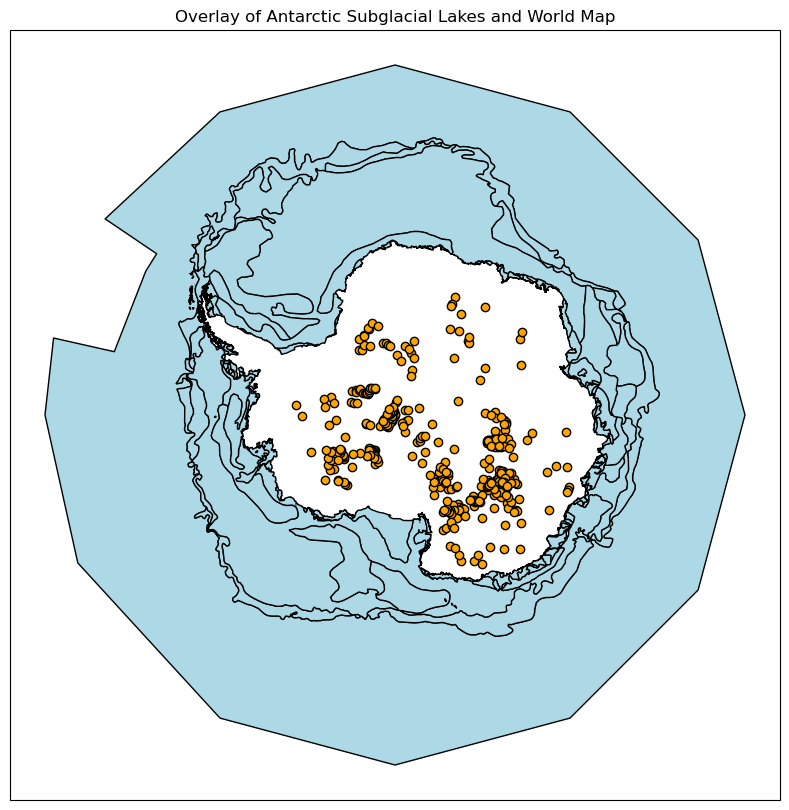

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs

# load Antarctic subglacial lakes
lakes = pd.read_csv('data/lakes/subglacial_lakes_2012update.csv', encoding='latin1')
lakes.rename(columns={'Lat.         oN':'Latitude', 'Lon.       oE':'Longitude'}, inplace=True)
lakes_gdf = gpd.GeoDataFrame(lakes, geometry=gpd.points_from_xy(lakes['Longitude'], lakes['Latitude']))
lakes_gdf.set_crs("EPSG:4326", inplace=True)

# we are plotting in Antarctic polar stereographic projection XXX EPSG:3031
lakes_gdf = lakes_gdf.to_crs("EPSG:3031")

world = gpd.read_file('data/antarc241115/ANTARC241115.shp')
world = world.to_crs("EPSG:3031")

proj = ccrs.Stereographic(central_longitude=0, central_latitude=-90)

fig, ax = plt.subplots(subplot_kw={"projection": proj}, figsize=(10, 10))

world.plot(ax=ax, facecolor='lightblue', edgecolor='black')
lakes_gdf.plot(ax=ax, facecolor='orange', edgecolor='black')

ax.set_title("Overlay of Antarctic Subglacial Lakes and World Map")
plt.show()


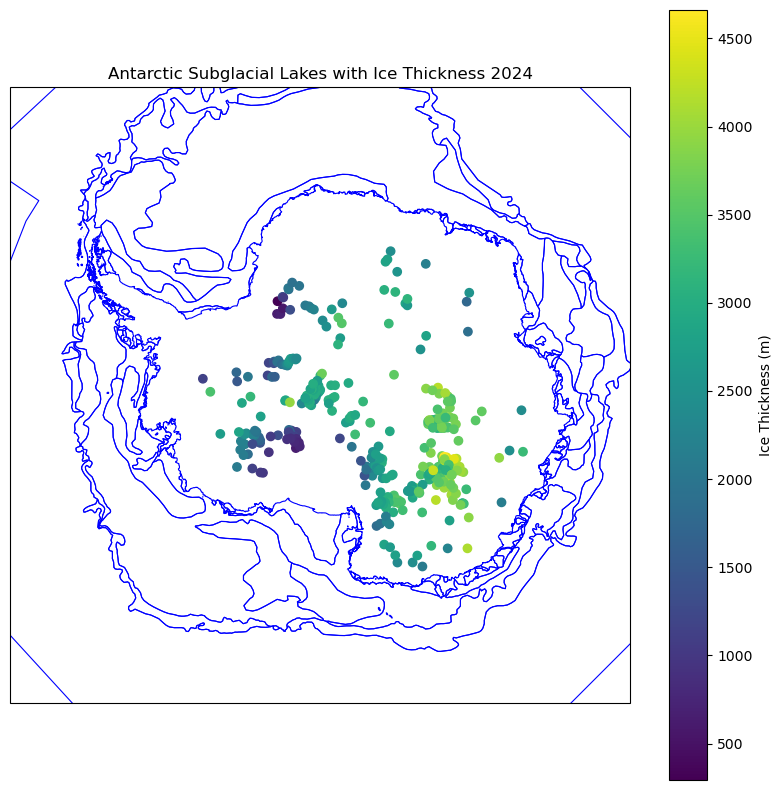

In [12]:
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs

# Load Antarctic subglacial lakes
lakes = pd.read_csv('data/lakes/subglacial_lakes_2012update.csv', encoding='latin1')
lakes.rename(columns={'Lat.         oN': 'Latitude', 'Lon.       oE': 'Longitude'}, inplace=True)
lakes_gdf = gpd.GeoDataFrame(lakes, geometry=gpd.points_from_xy(lakes['Longitude'], lakes['Latitude']))

# Set lakes CRS to WGS84 (EPSG:4326) and transform to Antarctic Polar Stereographic (EPSG:3031)
lakes_gdf.set_crs(epsg=4326, inplace=True)
lakes_gdf = lakes_gdf.to_crs(epsg=3031)

# Load Antarctic shapefile and transform to EPSG:3031
world = gpd.read_file('data/antarc241115/ANTARC241115.shp')
world = world.to_crs(epsg=3031)

# Plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.SouthPolarStereo()})
world.boundary.plot(ax=ax, transform=ccrs.SouthPolarStereo(), linewidth=0.8, color='blue')
lakes_gdf.plot(ax=ax, cmap='viridis', column='Ice thickness m', legend=True, 
               legend_kwds={'label': "Ice Thickness (m)"}, transform=ccrs.SouthPolarStereo())

# Adjust map extent if needed
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())  # Adjust bounds for rotation

plt.title("Antarctic Subglacial Lakes with Ice Thickness 2024")
plt.show()

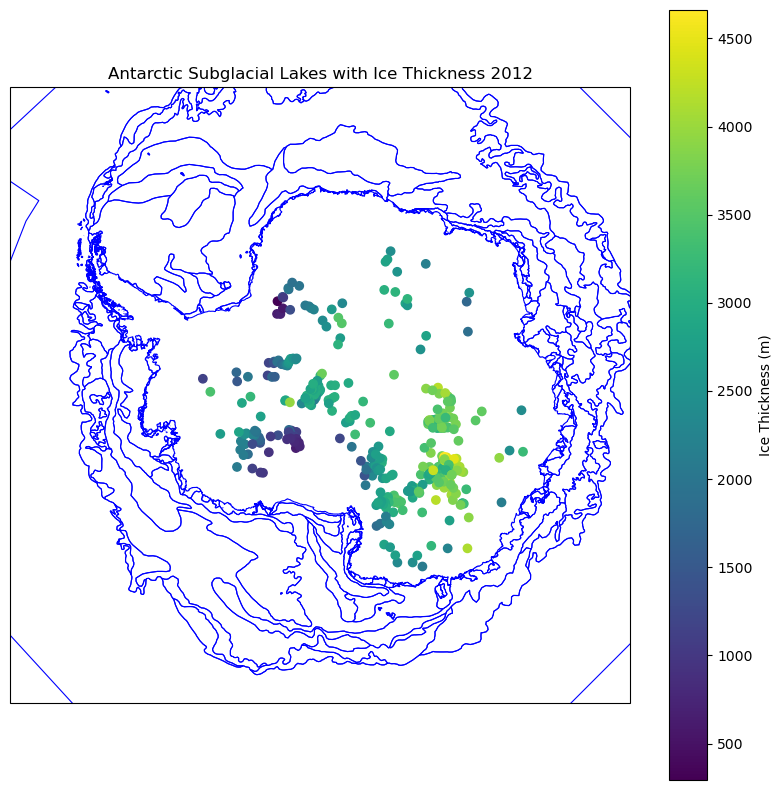

In [13]:
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs

# Load Antarctic subglacial lakes
lakes = pd.read_csv('data/lakes/subglacial_lakes_2012update.csv', encoding='latin1')
lakes.rename(columns={'Lat.         oN': 'Latitude', 'Lon.       oE': 'Longitude'}, inplace=True)
lakes_gdf = gpd.GeoDataFrame(lakes, geometry=gpd.points_from_xy(lakes['Longitude'], lakes['Latitude']))

# Set lakes CRS to WGS84 (EPSG:4326) and transform to Antarctic Polar Stereographic (EPSG:3031)
lakes_gdf.set_crs(epsg=4326, inplace=True)
lakes_gdf = lakes_gdf.to_crs(epsg=3031)

# Load Antarctic shapefile and transform to EPSG:3031
world = gpd.read_file('data\\antarc121112\\ANTARC121112.shp')
world = world.to_crs(epsg=3031)

# Plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.SouthPolarStereo()})
world.boundary.plot(ax=ax, transform=ccrs.SouthPolarStereo(), linewidth=0.8, color='blue')
lakes_gdf.plot(ax=ax, cmap='viridis', column='Ice thickness m', legend=True, 
               legend_kwds={'label': "Ice Thickness (m)"}, transform=ccrs.SouthPolarStereo())

# Adjust map extent if needed
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())  # Adjust bounds for rotation

plt.title("Antarctic Subglacial Lakes with Ice Thickness 2012")
plt.show()

spacing

<h2>bedmaps</h2>

<h4>Surface Height</h4>

In [14]:
import xarray as xr
import rioxarray as xrio

surface_tif_path = 'data\\bedmap2_tiff\\bedmap2_surface.tif'
surface_xr = xrio.open_rasterio(surface_tif_path)

surface_xr

<xarray.DataArray (band: 1, y: 6667, x: 6667)> Size: 89MB
[44448889 values with dtype=int16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 53kB -3.333e+06 -3.332e+06 ... 3.332e+06 3.333e+06
  * y            (y) float64 53kB 3.333e+06 3.332e+06 ... -3.332e+06 -3.333e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  4082
    STATISTICS_MEAN:     1964.5365528824
    STATISTICS_MINIMUM:  1
    STATISTICS_STDDEV:   1172.5307214673
    _FillValue:          32767
    scale_factor:        1.0
    add_offset:          0.0

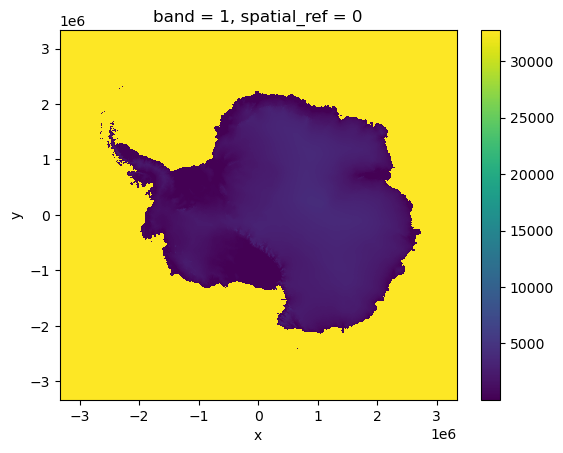

In [15]:
surface_xr.plot()

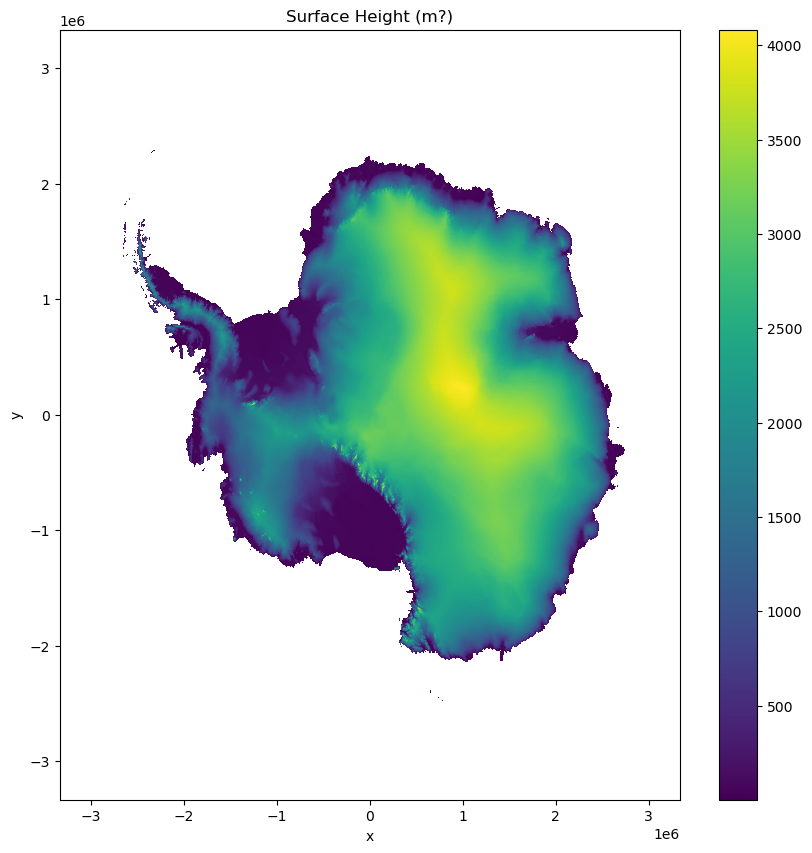

In [23]:
#Better plot

surface_xr_masked = surface_xr.where(surface_xr != 32767)

surface_xr_masked.plot(figsize=(10, 10), cmap='viridis')
plt.title("Surface Height (m?)")
# plt.colorbar(label='Pixel Values')
plt.show()


<h4>Ice Thickness</h4>

In [18]:
thickness_tif_path = 'data\\bedmap2_tiff\\bedmap2_thickness.tif'
thickness_xr = xrio.open_rasterio(thickness_tif_path)

thickness_xr

<xarray.DataArray (band: 1, y: 6667, x: 6667)> Size: 89MB
[44448889 values with dtype=int16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 53kB -3.333e+06 -3.332e+06 ... 3.332e+06 3.333e+06
  * y            (y) float64 53kB 3.333e+06 3.332e+06 ... -3.332e+06 -3.333e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  4621
    STATISTICS_MEAN:     1926.6438367784
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   1052.6332469716
    _FillValue:          32767
    scale_factor:        1.0
    add_offset:          0.0

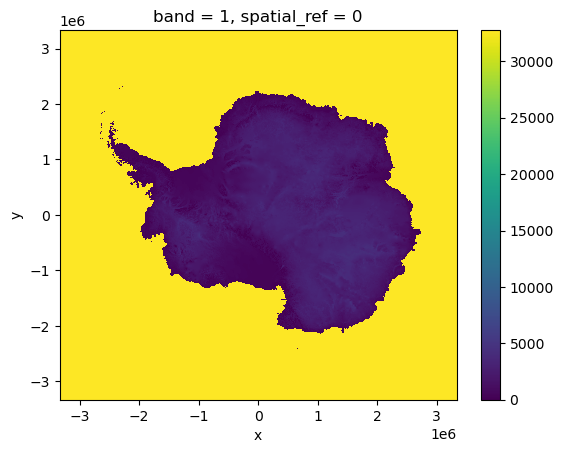

In [19]:
thickness_xr.plot()

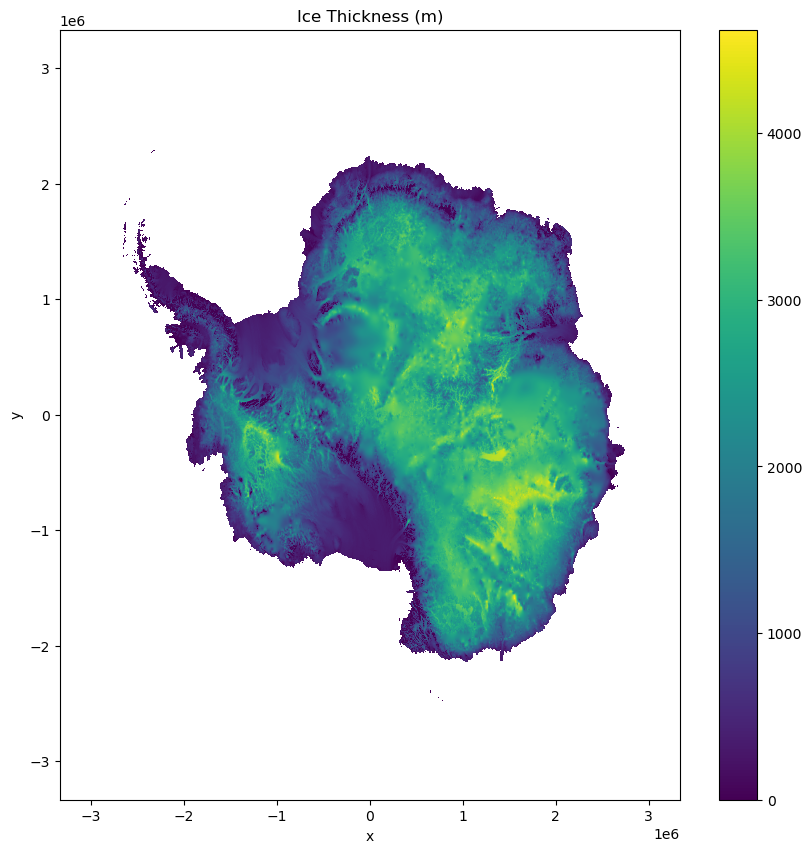

In [25]:
#Better plot

thickness_xr_masked = thickness_xr.where(thickness_xr != 32767)

thickness_xr_masked.plot(figsize=(10, 10), cmap='viridis')
plt.title("Ice Thickness (m)")
# plt.colorbar(label='Pixel Values')
plt.show()


<h4>Digital Elevation Model (DEM)</h4>

In [26]:
dem_path = 'data\dem\RCbRT8Dd.tiff'

dem_xr = xrio.open_rasterio(dem_path)
dem_xr

<xarray.DataArray (band: 1, y: 884, x: 979)> Size: 3MB
[865436 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 8kB -3.393e+06 -3.385e+06 ... 3.907e+06 3.914e+06
  * y            (y) float64 7kB 3.156e+06 3.149e+06 ... -3.433e+06 -3.441e+06
    spatial_ref  int64 8B 0
Attributes:
    DataType:         Generic
    AREA_OR_POINT:    Area
    SourceBandIndex:  0
    _FillValue:       -9999.0
    scale_factor:     1.0
    add_offset:       0.0

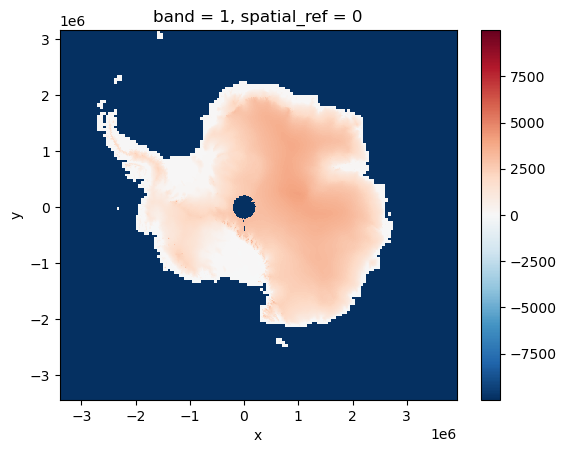

In [28]:
dem_xr.plot()

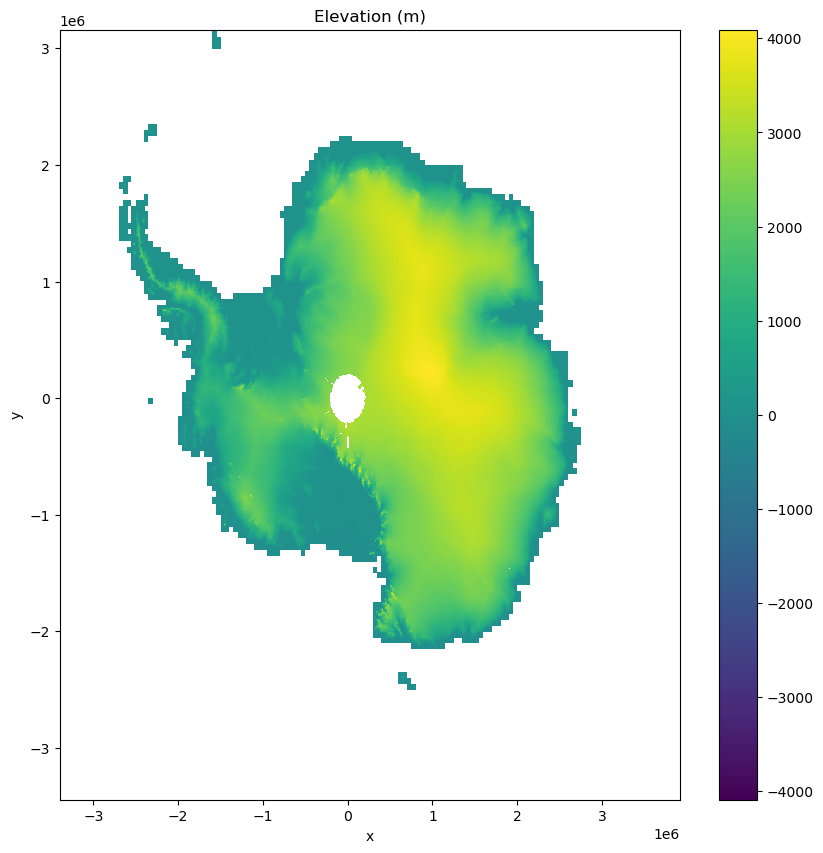

In [27]:
#Better plot

dem_xr_masked = dem_xr.where(dem_xr != -9999)

dem_xr_masked.plot(figsize=(10, 10), cmap='viridis')
plt.title("Elevation (m)")
# plt.colorbar(label='Pixel Values')
plt.show()